# Mạng nơ ron đơn tầng, đa lớp

- Họ và tên: Kim Minh Thắng
- Mã số sinh viên: B2007210


## 1. Thực hành 1

Tổng hợp các mã lệnh được trình bày để xây dựng một mạng neuron đơn tầng, 3 lớp với dữ liệu huấn luyện như bên dưới.

```python
X = tf.constant([[0.0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])

y = tf.constant([[1.0, 0, 0],
                [0, 1, 0],
                [0, 1, 0],
                [1, 0, 1]])
```

### 1.1. Import các gói cần thiết

In [67]:
import tensorflow as tf

### 1.2. Hàm predict

In [68]:
@tf.function
def predict(X, W, b):
    return tf.nn.softmax(tf.matmul(X, W) + b)

### 1.3. Hàm loss

In [69]:
@tf.function
def loss(y, yhat):
    return -tf.reduce_mean(tf.reduce_sum(y * tf.math.log(yhat), axis=1))

### 1.4. Khởi tạo các tham số

In [70]:
X = tf.constant([[0.0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])

y = tf.constant([[1.0, 0, 0],
                 [0, 1, 0],
                 [0, 1, 0],
                 [1, 0, 1]])
W = tf.Variable(tf.random.normal((2, 3)))
b = tf.Variable(tf.random.normal((3,)))

alpha=.1

### 1.5. Huấn luyện mô hình

In [71]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        y_hat = predict(X, W, b)
        loss_val = loss(y, y_hat)
        
    loss_his.append(loss_val)        
    
    if it % 50 == 0:
        print(f'{it}, loss = {loss_val}')
    
    dW, db = tape.gradient(loss_val, [W, b])
    
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

0, loss = 2.409616231918335
50, loss = 1.167853832244873
100, loss = 1.1376407146453857
150, loss = 1.124657392501831
200, loss = 1.1156460046768188
250, loss = 1.108886957168579
300, loss = 1.1035057306289673
350, loss = 1.099038004875183
400, loss = 1.095221757888794
450, loss = 1.0918986797332764


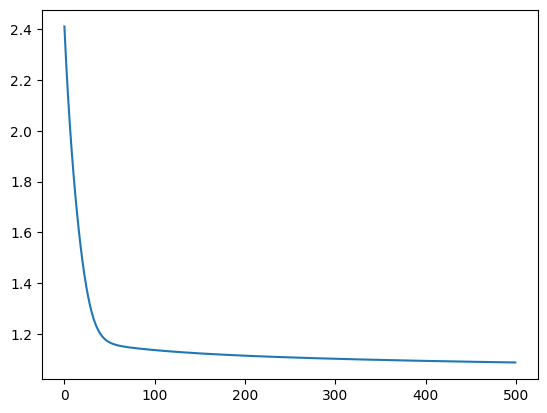

In [72]:
import matplotlib.pyplot as plt

plt.plot(loss_his)

## 2. Thực hành 2

Làm lại bài phân loại hoa iris (3 lớp) với Tensorflow thay vì dùng Keras
- Cần mã hoá đầu ra mong muốn: có thể xử lý thủ công hoặc dùng công cụ
- Sử dụng hàm lỗi Categorical Cross-Entropy
- Cần xử lý đầu ra để tìm nhãn chính xác (sử dụng hàm argmax để tìm cột có giá trị lớn nhất)
- Tính độ chính xác phân lớp bằng cách so sánh nhãn dự báo và nhãn mong muốn
- Có thể dùng hàm Tensor.numpy() để lấy giá trị của

Tensor về dạng numpy để hậu xử lý.

### 2.1. Import các gói cần thiết

In [73]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### 2.2. Đọc dữ liệu và xử lý dữ liệu

#### Đọc dữ liệu từ file `csv`

In [74]:
df = pd.read_csv("./Iris.csv")

#### Tách các cột đặc trưng và nhãn

In [75]:
X = df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]
y = df['Species']

Sử dụng `LabelEncoder` để mã hoá nhãn

In [76]:
le = LabelEncoder()
y = le.fit_transform(y)

pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Sử dụng `OneHotEncoder` để mã hoá nhãn

In [77]:
y = y.reshape(-1, 1)
one = OneHotEncoder()

y = one.fit_transform(y).toarray()

pd.DataFrame(y)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


#### Chia dữ liệu thành 2 tập train và test

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train = tf.constant(x_train.values, dtype=tf.float32)
x_test = tf.constant(x_test.values, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

### 2.3. Hàm predict    

In [79]:
@tf.function
def predict(X, W, b):
    return tf.nn.softmax(tf.matmul(X, W) + b)

### 2.4. Hàm loss

In [80]:
@tf.function
def loss(y, yhat):
    return -tf.reduce_mean(tf.reduce_sum(y * tf.math.log(yhat), axis=1))

### 2.5. Huấn luyện mô hình

In [81]:
W = tf.Variable(tf.random.normal((4, 3)))
b = tf.Variable(tf.random.normal((3,)))
alpha = .1

In [82]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        y_hat = predict(x_train, W, b)
        loss_val = loss(y_train, y_hat)
        
    loss_his.append(loss_val)        
    
    if it % 50 == 0:
        print(f'{it}, loss = {loss_val}')
    
    dW, db = tape.gradient(loss_val, [W, b])
    
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

0, loss = 7.582356929779053
50, loss = 0.6580315232276917
100, loss = 0.5113102197647095
150, loss = 0.3898243010044098
200, loss = 0.2828531563282013
250, loss = 0.24543118476867676
300, loss = 0.2250976264476776
350, loss = 0.20894291996955872
400, loss = 0.19576714932918549
450, loss = 0.1847989708185196


### 2.6. Đánh giá mô hình

In [83]:
y_hat = predict(x_test, W, b)

y_hat = y_hat.numpy().argmax(axis=1)

acc = (y_hat == y_test.numpy().argmax(axis=1)).mean()

print(f'Accuracy = {acc}')

Accuracy = 0.9666666666666667


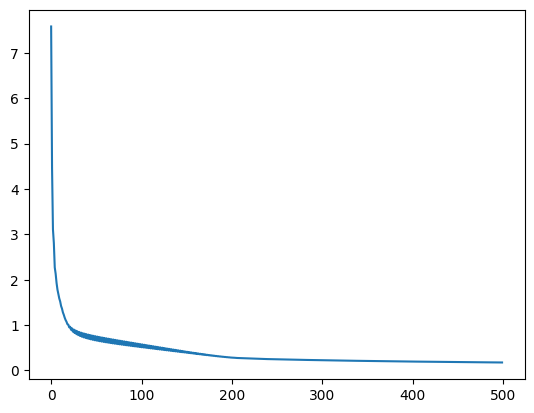

In [84]:
import matplotlib.pyplot as plt

plt.plot(loss_his)